In [1]:
import copy
import itertools
import functools
import numpy as np
import torch
import torch.utils.data
import torchvision.transforms as torch_transforms
import encoding.datasets as enc_ds
import torchvision.transforms as transforms
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
encoding_datasets = {
    x: functools.partial(enc_ds.get_dataset, x)
    for x in ["coco", "ade20k", "pascal_voc", "pascal_aug", "pcontext", "citys", "vizwiz"]
}
encoding_datasets

{'coco': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'coco'),
 'ade20k': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'ade20k'),
 'pascal_voc': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'pascal_voc'),
 'pascal_aug': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'pascal_aug'),
 'pcontext': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'pcontext'),
 'citys': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'citys'),
 'vizwiz': functools.partial(<function get_dataset at 0x7f5b6236c5e0>, 'vizwiz')}

In [3]:
norm_mean= [0.5, 0.5, 0.5]
norm_std = [0.5, 0.5, 0.5]
train_transform = [
            transforms.ToTensor(),
#             transforms.Normalize(norm_mean, norm_std),
        ]
train_transform = transforms.Compose(train_transform)
kwargs = {'root': '../datasets/', 
          'split': 'train', 
          'mode': 'train', 
          'transform': train_transform, 
          'base_size': 520,
          'crop_size': 480}
# name = 'ade20k'
name = 'vizwiz'
dataset = encoding_datasets[name.lower()](**kwargs)

BaseDataset: base_size 520, crop_size 480
len(img_paths): 6494


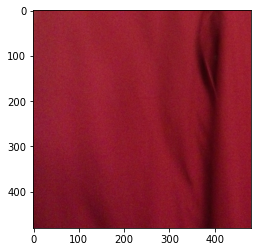

In [5]:
img0, mask0, q0 = dataset[0]
plt.imshow(img0.permute(1, 2, 0))

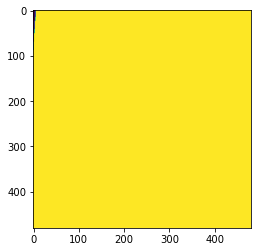

In [6]:
plt.imshow(mask0)

In [8]:
q0

'What color is this shirt? Question mark.'

In [10]:
mask0 // 255

tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])

In [10]:
def get_labels():
    labels = []
    path = '../datasets/ADEChallengeData2016/objectInfo150.txt'
    assert os.path.exists(path), '*** Error : {} not exist !!!'.format(path)
    f = open(path, 'r') 
    lines = f.readlines()      
    for line in lines: 
        label = line.strip().split(',')[-1].split(';')[0]
        labels.append(label)
    f.close()
    labels = labels[1:]
    return labels

labels = get_labels()
# labels

In [21]:
train_image_paths = glob('../datasets/VizWizGrounding2022/train/*.jpg')
train_mask_paths = glob('../datasets/VizWizGrounding2022/binary_masks_png/train/*.png')
val_image_paths = glob('../datasets/VizWizGrounding2022/val/*.jpg')
val_mask_paths = glob('../datasets/VizWizGrounding2022/binary_masks_png/val/*.png')
test_image_paths = glob('../datasets/VizWizGrounding2022/test/*.jpg')
# test_mask_paths = glob('../datasets/VizWizGrounding2022/binary_masks_png/train/*.png')
len(train_image_paths), len(train_mask_paths), len(val_image_paths), len(val_mask_paths),len(test_image_paths)

(23954, 6494, 7750, 1131, 8000)

In [19]:
def _get_name_from_path(path):
    return os.path.basename(os.path.normpath(path))

train_paths[0],_get_name_from_path(train_paths[0])

('../datasets/VizWizGrounding2022/train/VizWiz_train_00023582.jpg',
 'VizWiz_train_00023582.jpg')